In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
def MatchWord(mysoup):
  match_word = re.findall(r"\d",mysoup)
  result = ''.join(match_word)
  return result

In [3]:
def WebCrawler(url,category):
  url = url
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
  resp = requests.get(url, headers=headers)
  soups = BeautifulSoup(resp.text,"html.parser")
  commodity_list = []
  for mysoup in soups.find_all("li",{"class":"li2 mr8"}):
    dic = {}
    dic['類別'] = category
    dic['商品'] = mysoup.find("div",{"class":"title"}).text
    dic['已售出'] = MatchWord(mysoup.find("div",{"class":"p1"}).text)
    dic['原價'] = MatchWord(mysoup.find("div",{"class":"p2"}).text)
    dic['售價'] = MatchWord(mysoup.find("div",{"class":"p3"}).text)
    commodity_list.append(dic)

  for soup in soups.find_all("ul",{"class":"t1"}):
    for mysoup in soup.find_all("li",{"class":"li2"}):
        dic = {}
        dic['類別'] = category
        dic['商品'] = mysoup.find("div",{"class":"title"}).text
        dic['已售出'] = MatchWord(mysoup.find("div",{"class":"p1"}).text)
        dic['原價'] = MatchWord(mysoup.find("div",{"class":"p2"}).text)
        dic['售價'] = MatchWord(mysoup.find("div",{"class":"p3"}).text)
        commodity_list.append(dic)
  data = pd.DataFrame(commodity_list)
  return data


In [4]:
url = 'https://i3fresh.tw/inpage_55_187.html'
df1 = WebCrawler(url,'Fried food')
df1

,類別,商品,已售出,原價,售價
0,Fried food,\n黃金香酥旗魚塊,239055,259,159
1,Fried food,\n鮮嫩唐揚無骨雞腿塊,19383,189,99
2,Fried food,\n招牌無骨鹽酥雞15入自由選,981,2100,79
3,Fried food,\n美國熱銷薯片8入自由選,26046,1832,119
4,Fried food,\n美國熱銷薯片6入自由選,48613,1374,129
5,Fried food,\n飛虎魚炸魚塊,149,309,149
6,Fried food,\n黃金酥炸魷魚條,703,199,79
7,Fried food,\n辣味蒜香薯球,159,299,139
8,Fried food,\n蒜香鹽酥杏鮑菇,8067,159,79
9,Fried food,\n美式香濃起司薯球,25784,220,149


In [5]:
url = 'https://i3fresh.tw/inpage_55_189.html'
df2 = WebCrawler(url,'Fat loss meal')

url = 'https://i3fresh.tw/inpage_55_201.html'
df3 = WebCrawler(url,'Roast food')

url = 'https://i3fresh.tw/inpage_55_188.html'
df4 = WebCrawler(url,'Braised food')

In [6]:
url = 'https://i3fresh.tw/inpage_55_200.html'
df5 = WebCrawler(url,'Dumplings/Ravioli')

url = 'https://i3fresh.tw/inpage_55_193.html'
df6 = WebCrawler(url,'Pasta/Noodle')

url = 'https://i3fresh.tw/inpage_55_194.html'
df7 = WebCrawler(url,'Soup')

In [7]:
url = 'https://i3fresh.tw/inpage_11.html'
df8 = WebCrawler(url,'Meat')

url = 'https://i3fresh.tw/inpage_12.html'
df9 = WebCrawler(url,'Seafood')

url = 'https://i3fresh.tw/inpage_16.html'
df10 = WebCrawler(url,'Fruit/Vegetable')

In [8]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df

,類別,商品,已售出,原價,售價
0,Fried food,\n黃金香酥旗魚塊,239055,259,159
1,Fried food,\n鮮嫩唐揚無骨雞腿塊,19383,189,99
2,Fried food,\n招牌無骨鹽酥雞15入自由選,981,2100,79
3,Fried food,\n美國熱銷薯片8入自由選,26046,1832,119
4,Fried food,\n美國熱銷薯片6入自由選,48613,1374,129
...,...,...,...,...,...
88,Fruit/Vegetable,\n冰烤紫御地瓜,41838,160,89
89,Fruit/Vegetable,\n冷凍蔬菜鮮凍油菜花,60359,109,69
90,Fruit/Vegetable,\n鮮凍草莓脆果,161800,189,69
91,Fruit/Vegetable,\n泰國進口冷凍山竹,258415,359,159


In [9]:
df['已售出'] = df['已售出'].astype(int)
df['售價'] = df['售價'].astype(float)
df['原價'] = df['原價'].astype(float)
df['折價'] = round(df['售價'] / df['原價'],3)

In [10]:
df

,類別,商品,已售出,原價,售價,折價
0,Fried food,\n黃金香酥旗魚塊,239055,259.0,159.0,0.614
1,Fried food,\n鮮嫩唐揚無骨雞腿塊,19383,189.0,99.0,0.524
2,Fried food,\n招牌無骨鹽酥雞15入自由選,981,2100.0,79.0,0.038
3,Fried food,\n美國熱銷薯片8入自由選,26046,1832.0,119.0,0.065
4,Fried food,\n美國熱銷薯片6入自由選,48613,1374.0,129.0,0.094
...,...,...,...,...,...,...
88,Fruit/Vegetable,\n冰烤紫御地瓜,41838,160.0,89.0,0.556
89,Fruit/Vegetable,\n冷凍蔬菜鮮凍油菜花,60359,109.0,69.0,0.633
90,Fruit/Vegetable,\n鮮凍草莓脆果,161800,189.0,69.0,0.365
91,Fruit/Vegetable,\n泰國進口冷凍山竹,258415,359.0,159.0,0.443


In [ ]:
df.to_csv(r"./commodity.csv",encoding='utf-8-sig')

In [ ]:
#存入MYSQL的版本
import mysql.connector
con = mysql.connector.connect(
    user = 'root',
    password = 'password',
    host = '127.0.0.1',
    database = 'mydb'
    )

cursor = con.cursor()

def WebCrawler_to_SQL(url,category):
  url = url
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}
  resp = requests.get(url, headers=headers)
  soups = BeautifulSoup(resp.text,"html.parser")
  n = 0
  for mysoup in soups.find_all("li",{"class":"li2 mr8"}):
    Category = category
    Commodity = mysoup.find("div",{"class":"title"}).text
    Sold = int(MatchWord(mysoup.find("div",{"class":"p1"}).text))
    Original_price = float(MatchWord(mysoup.find("div",{"class":"p2"}).text))
    Selling_price = float(MatchWord(mysoup.find("div",{"class":"p3"}).text))
    cursor.execute("INSERT INTO commodity(Category,Commodity,Sold,Original_price,Selling_price) VALUES(%s, %s, %s, %s, %s)",(Category,Commodity,Sold,Original_price,Selling_price))
    con.commit()
    n += 1


  for soup in soups.find_all("ul",{"class":"t1"}):
    for mysoup in soup.find_all("li",{"class":"li2"}):
        Category = category
        Commodity = mysoup.find("div",{"class":"title"}).text
        Sold  = int(MatchWord(mysoup.find("div",{"class":"p1"}).text))
        Original_price = float(MatchWord(mysoup.find("div",{"class":"p2"}).text))
        Selling_price = float(MatchWord(mysoup.find("div",{"class":"p3"}).text))
        cursor.execute("INSERT INTO commodity(Category,Commodity,Sold,Original_price,Selling_price) VALUES(%s, %s, %s, %s, %s)",(Category,Commodity,Sold,Original_price,Selling_price))
        con.commit()
        n += 1
    print('共存入{}筆資料'.format(n))

url = 'https://i3fresh.tw/inpage_12.html'
WebCrawler_to_SQL(url,'Seafood')
con.close()

共存入155筆資料


In [11]:
df.columns = ['Category','Commodity','Sold','Original price','Selling price','Discount']

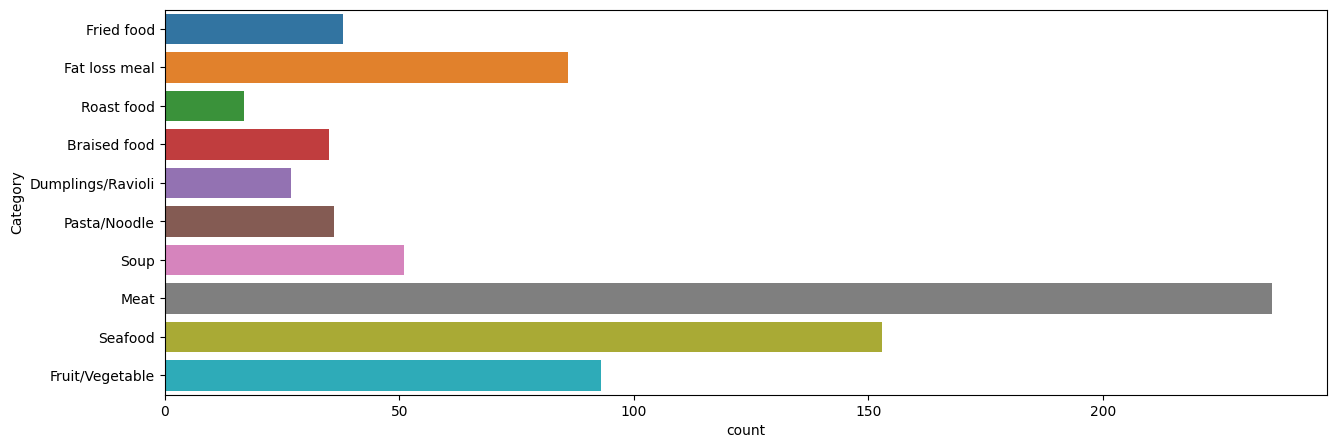

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Category' , data = df)
plt.show()

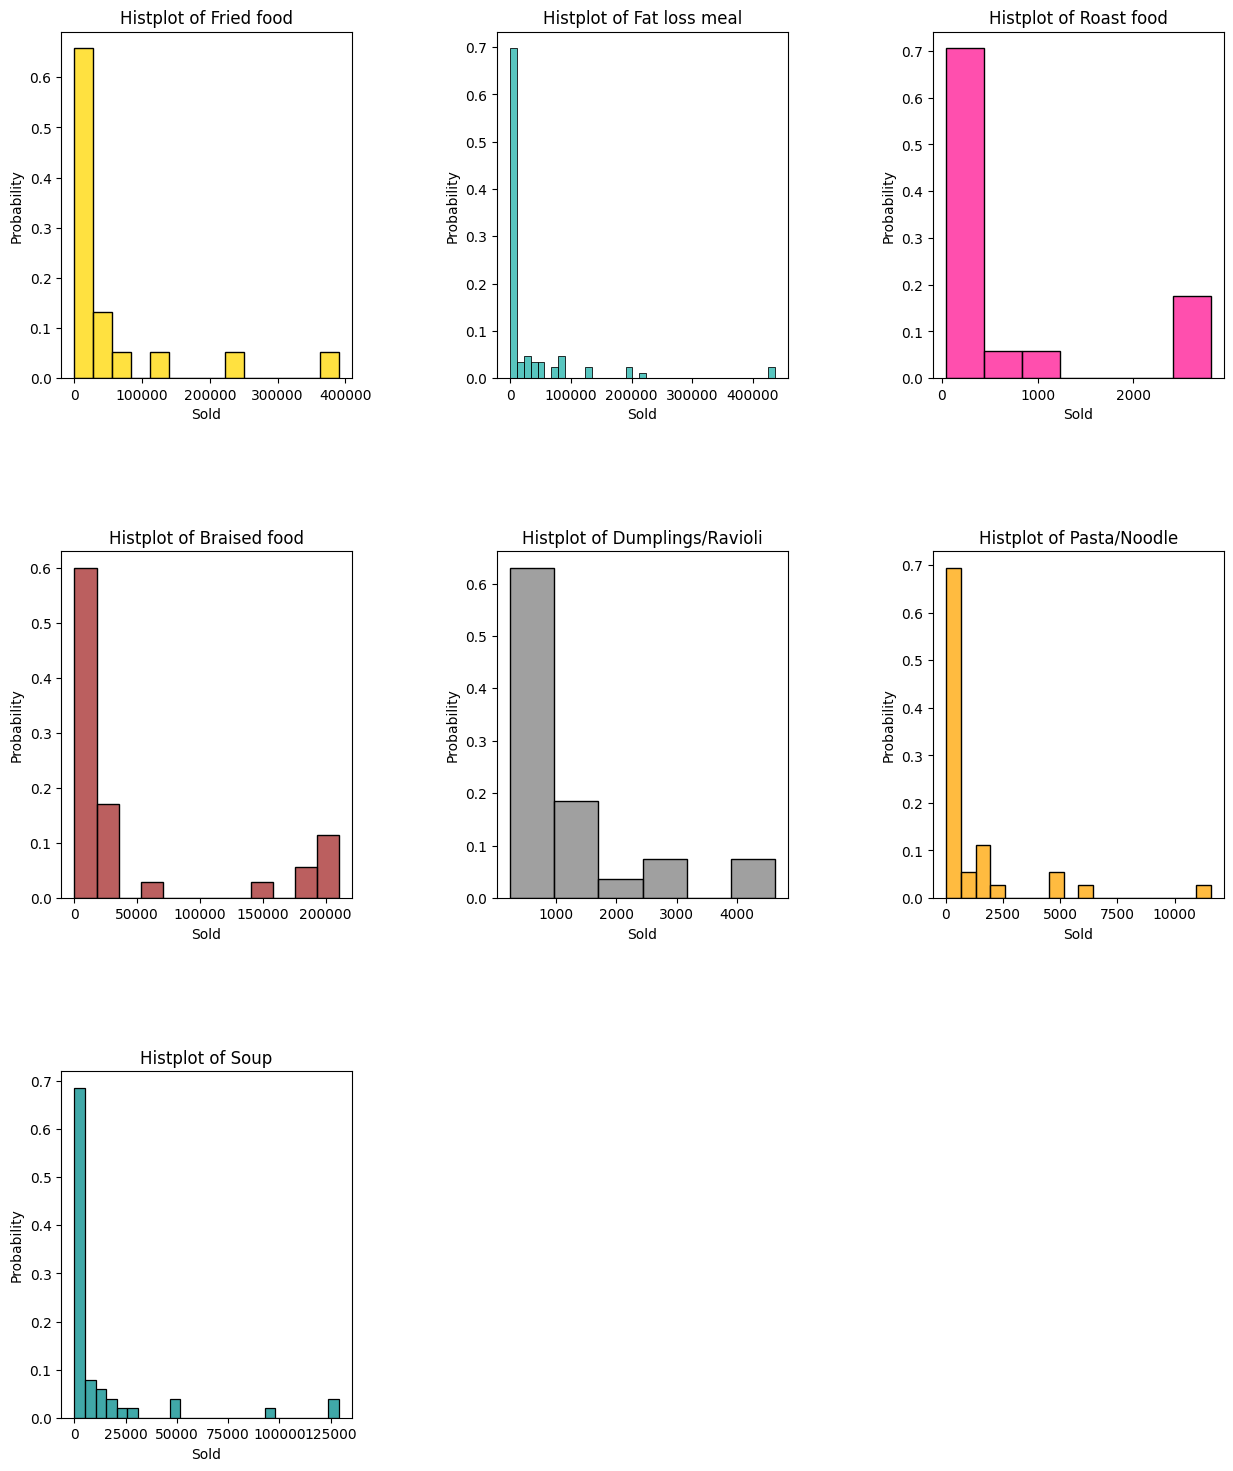

In [14]:
plt.figure(1, figsize=(15, 18))
n = 1
CategoryList = ['Fried food', 'Fat loss meal', 'Roast food', 'Braised food', 'Dumplings/Ravioli', 'Pasta/Noodle', 'Soup']

colors = ['gold', 'lightseagreen', 'deeppink', 'brown', 'gray', 'orange', 'darkcyan']

for x, color in zip(CategoryList, colors):
    plt.subplot(3, 3, n)
    sns.histplot(df[df['Category'] == x]['Sold'], stat="probability", color=color)
    plt.title('Histplot of {}'.format(x))
    n += 1

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

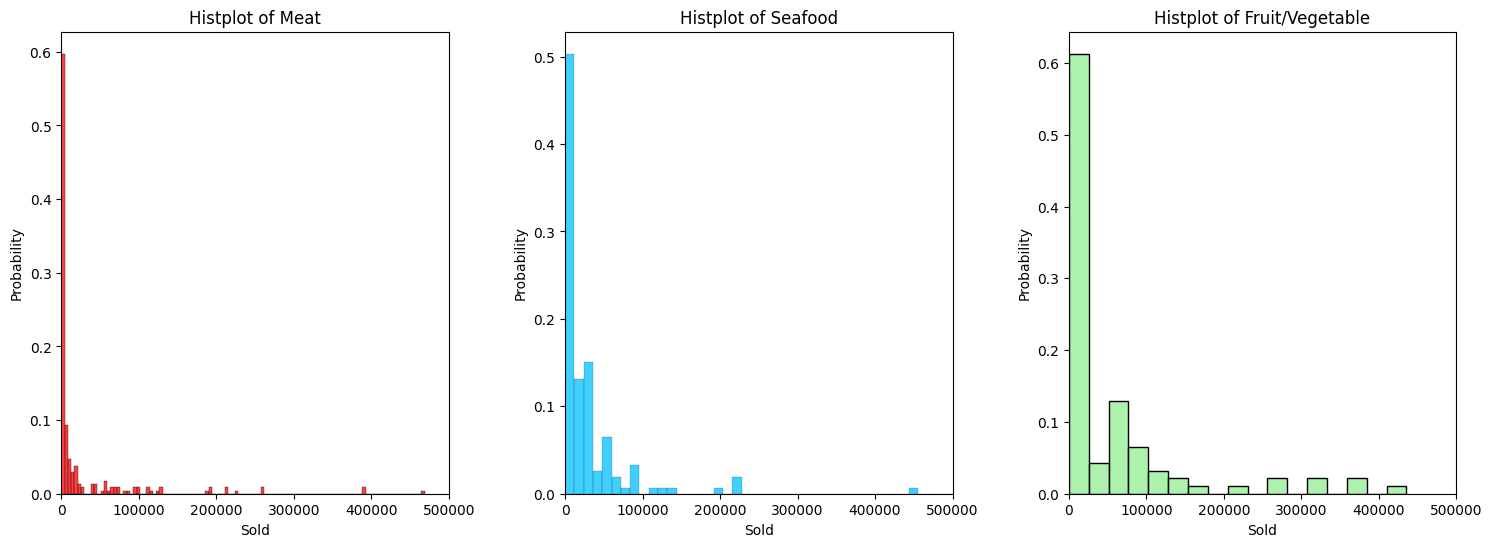

In [15]:
plt.figure(1, figsize=(18, 6))
n = 1
CategoryList = ['Meat', 'Seafood', 'Fruit/Vegetable']

colors = ['red', 'deepskyblue', 'lightgreen']

for x, color in zip(CategoryList, colors):
    plt.subplot(1, 3, n)
    sns.histplot(df[df['Category'] == x]['Sold'], stat="probability", color=color)
    plt.title('Histplot of {}'.format(x))
    plt.xlim(0, 500000)
    n += 1

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

(0.0, 500000.0)

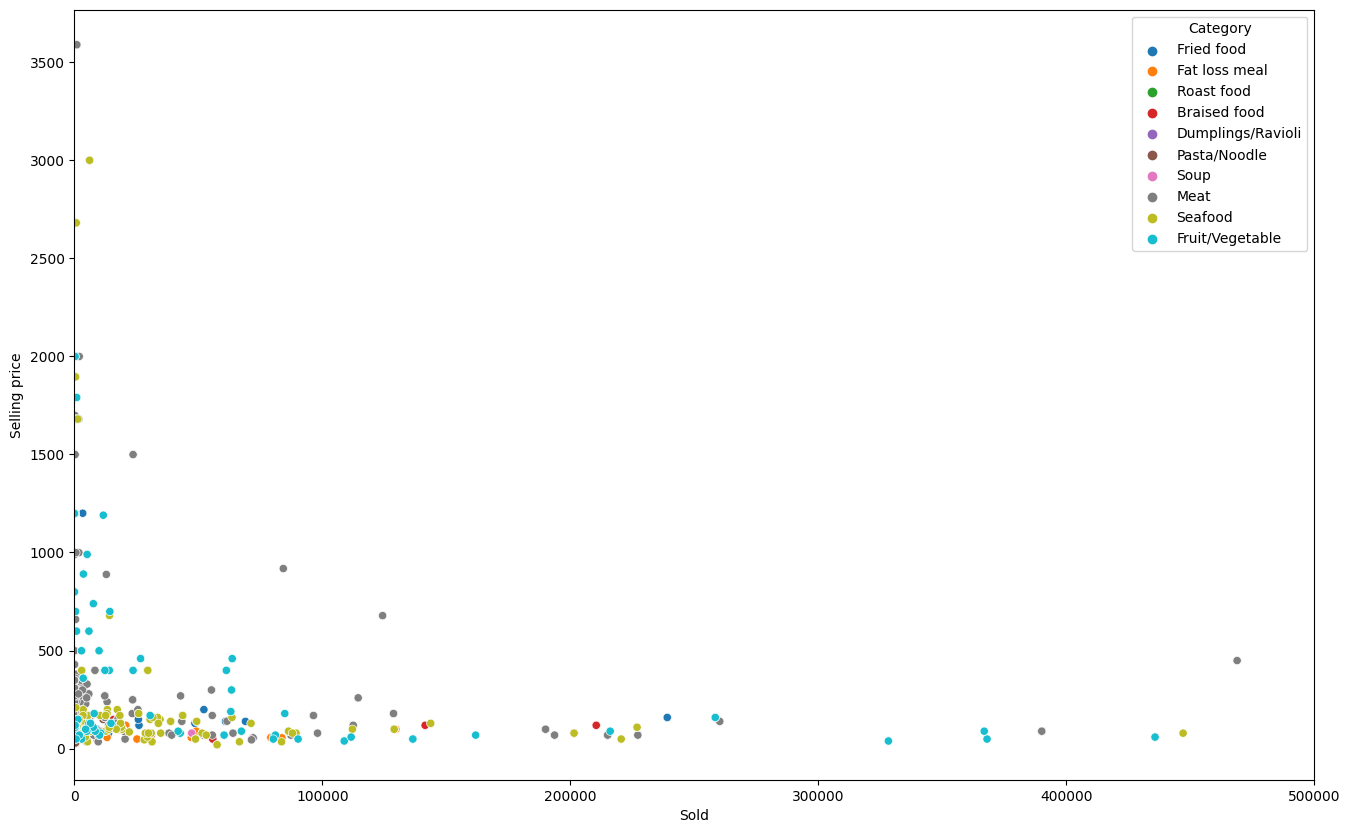

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.scatterplot(data = df, x="Sold", y="Selling price", hue='Category')
plt.xlim(0, 500000)

(0.0, 500000.0)

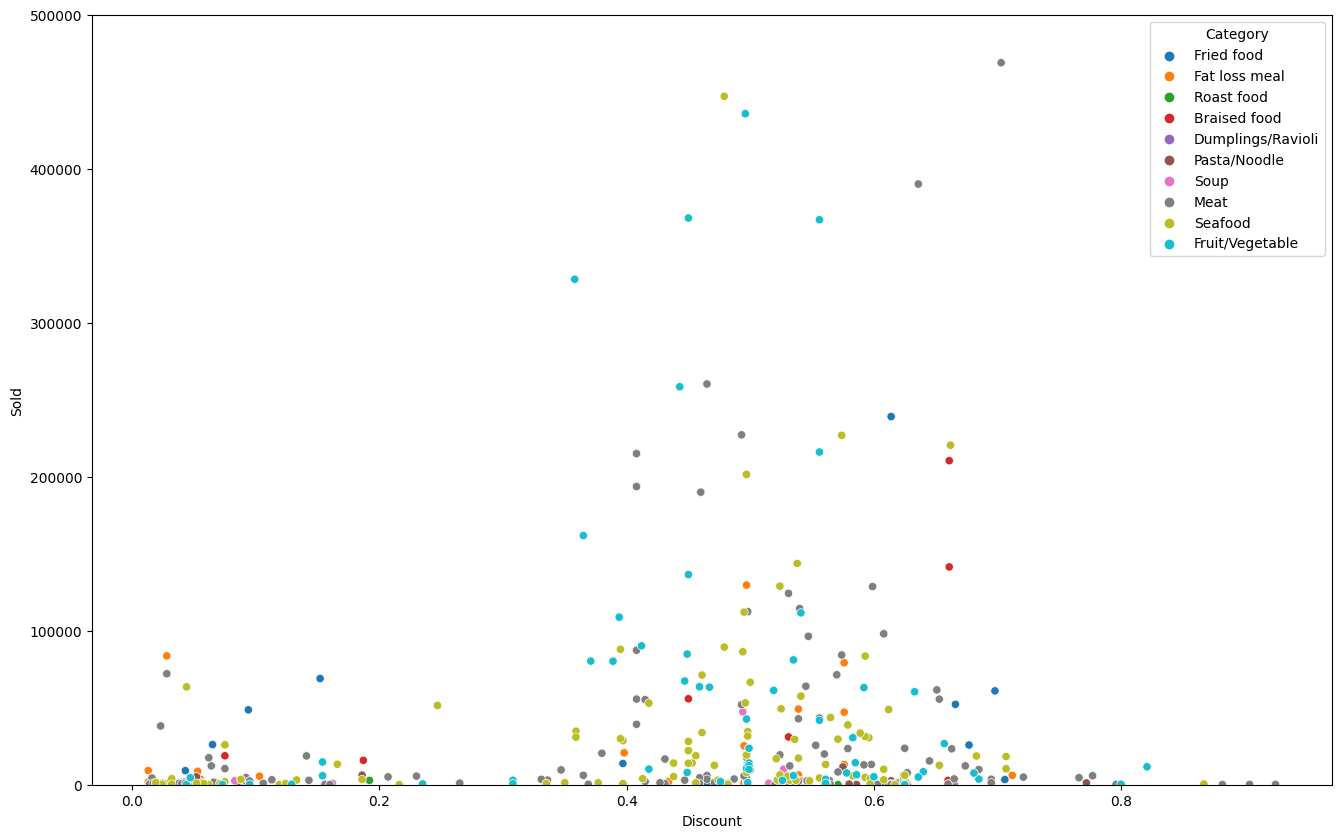

In [18]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = df, x="Discount", y="Sold", hue='Category')
plt.ylim(0, 500000)

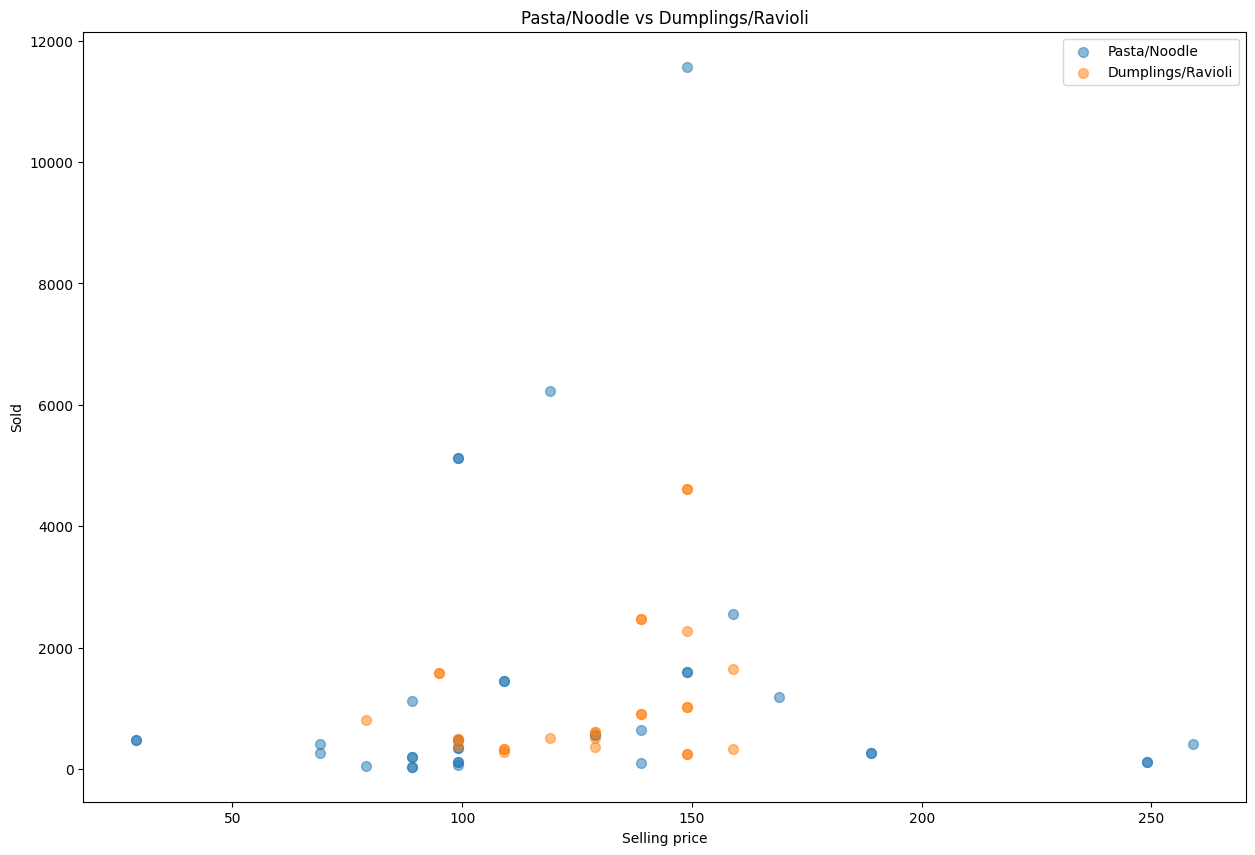

In [19]:
plt.figure(1 , figsize = (15 , 10))
for Category in ['Pasta/Noodle' , 'Dumplings/Ravioli']:
    plt.scatter(x = 'Selling price' , y = 'Sold' , data = df[df['Category'] == Category ] ,
                s = 50 , alpha = 0.5 , label = Category)
plt.xlabel('Selling price'), plt.ylabel('Sold')
plt.title('Pasta/Noodle vs Dumplings/Ravioli')
plt.legend()
plt.show()

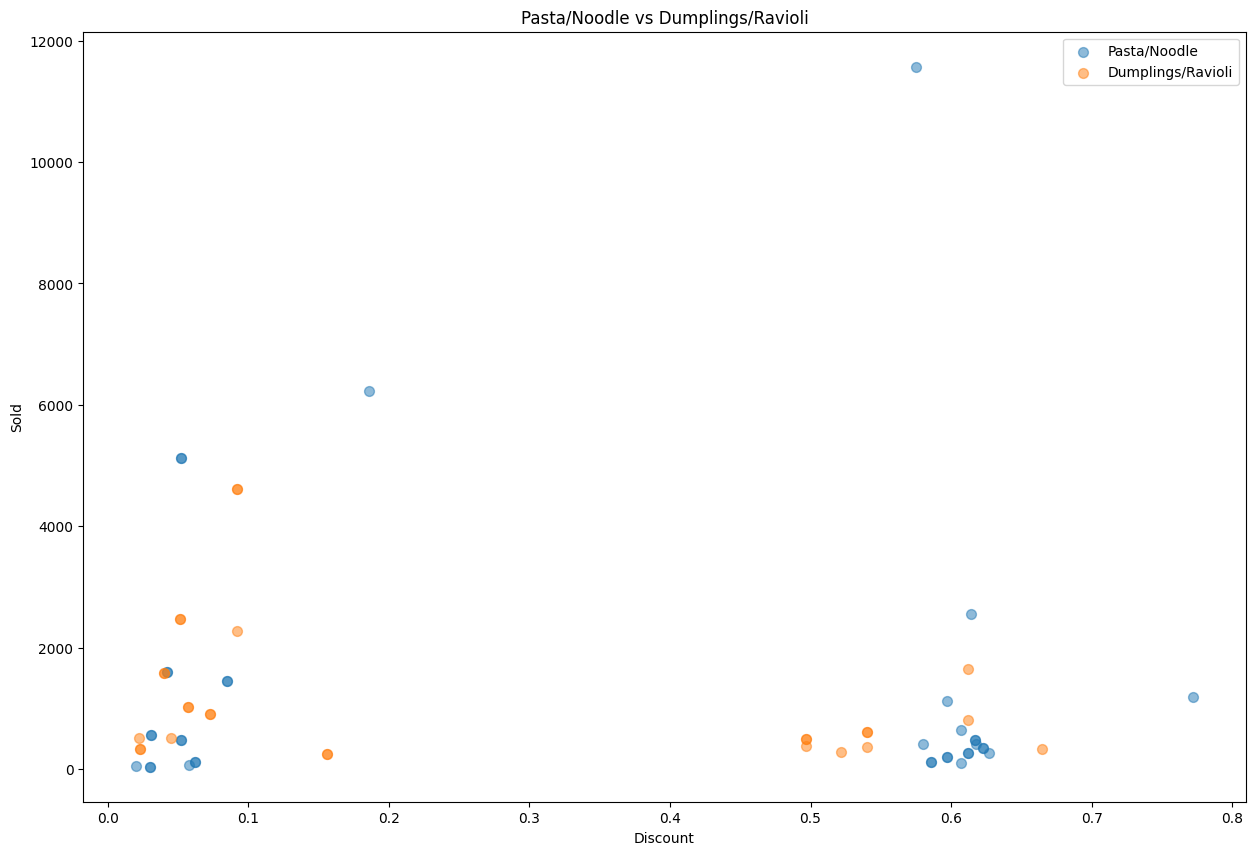

In [20]:
plt.figure(1 , figsize = (15 , 10))
for Category in ['Pasta/Noodle' , 'Dumplings/Ravioli']:
    plt.scatter(x = 'Discount' , y = 'Sold' , data = df[df['Category'] == Category ] ,
                s = 50 , alpha = 0.5 , label = Category)
plt.xlabel('Discount'), plt.ylabel('Sold')
plt.title('Pasta/Noodle vs Dumplings/Ravioli')
plt.legend()
plt.show()

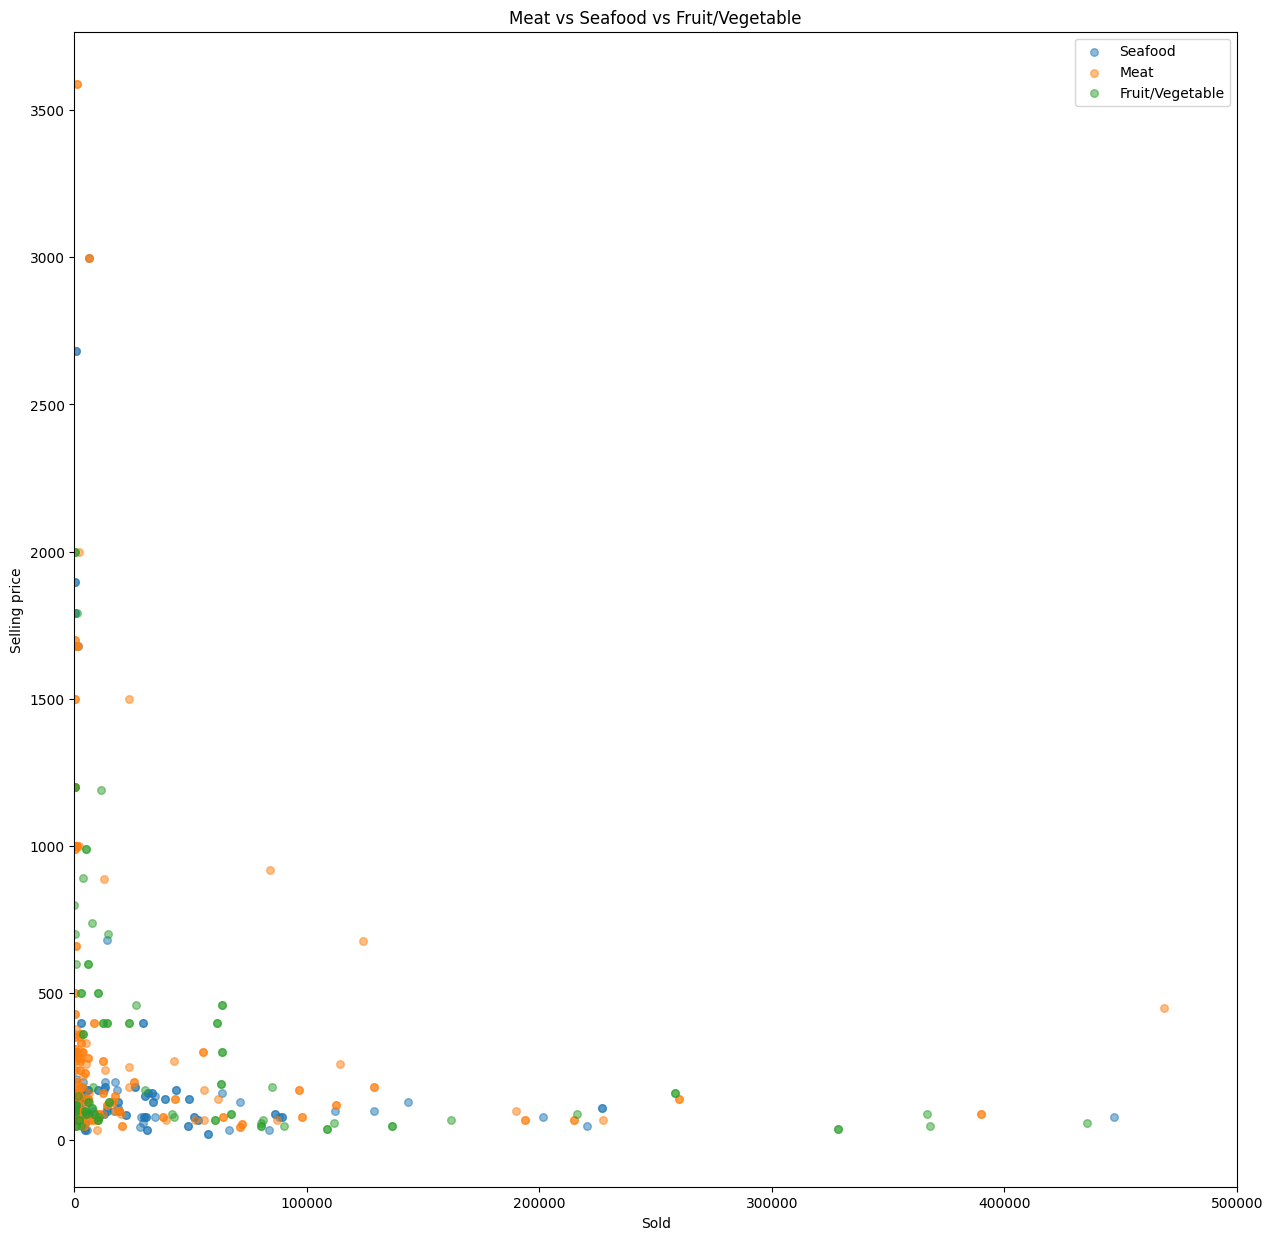

In [23]:
plt.figure(1 , figsize = (15 , 15))
for Category in ['Seafood' , 'Meat' ,'Fruit/Vegetable']:
    plt.scatter(x = 'Sold' , y = 'Selling price' , data = df[df['Category'] == Category ] ,
                s = 30 , alpha = 0.5  ,label = Category)
plt.xlabel('Sold'), plt.ylabel('Selling price')
plt.xlim(0, 500000)
plt.title('Meat vs Seafood vs Fruit/Vegetable')
plt.legend()
plt.show()

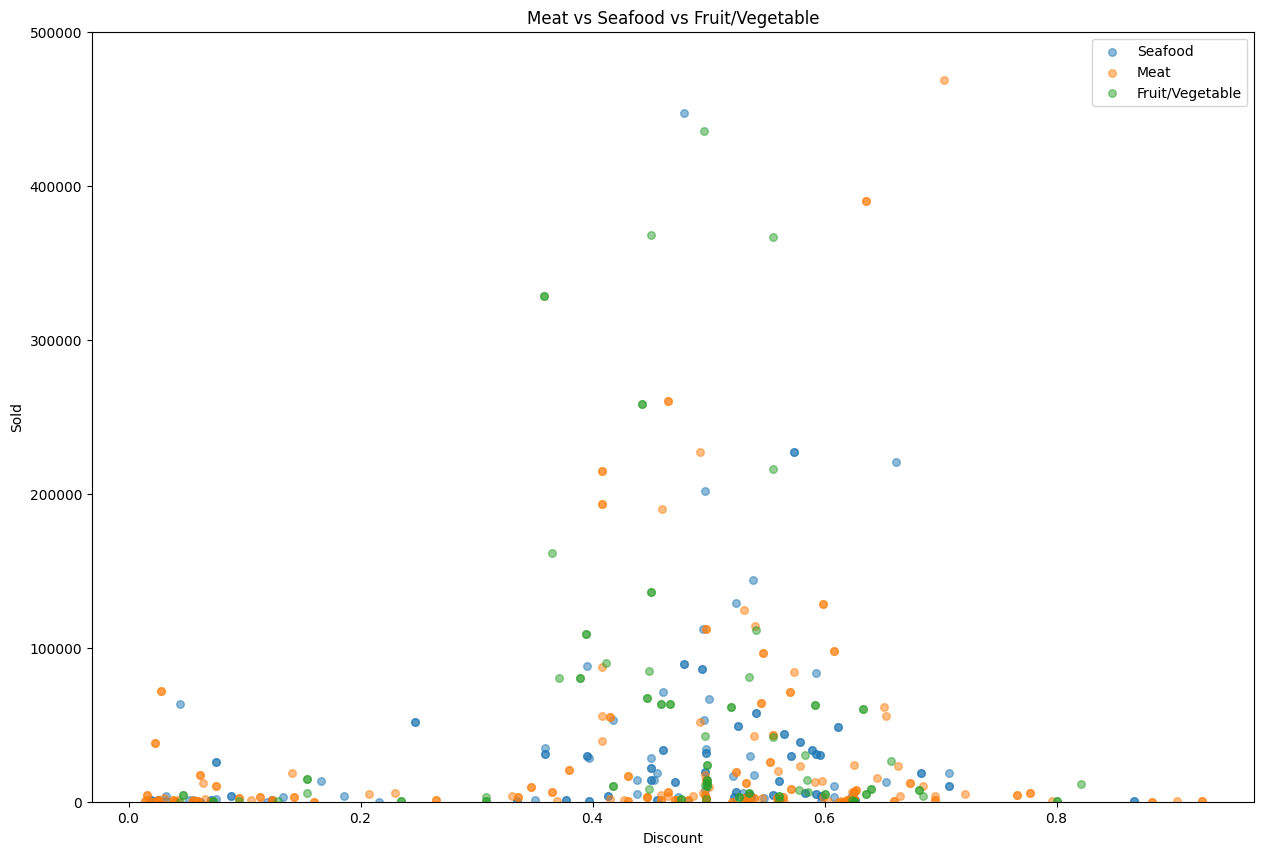

In [25]:
plt.figure(1 , figsize = (15 , 10))
for Category in ['Seafood' , 'Meat' ,'Fruit/Vegetable']:
    plt.scatter(x = 'Discount' , y = 'Sold' , data = df[df['Category'] == Category ] ,
                s = 30 , alpha = 0.5 , label = Category)
plt.xlabel('Discount'), plt.ylabel('Sold')
plt.ylim(0, 500000)
plt.title('Meat vs Seafood vs Fruit/Vegetable')
plt.legend()
plt.show()